In [221]:
from tqdm import tqdm
import sys
import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams["font.family"] = "Times New Roman"

## Figures

In [135]:
data = pd.read_pickle("data/data_work.pkl")

In [136]:
data["route_main"] = data["route"].str.replace("MADRID","")

In [138]:
data["mean_econ_price"]=data["mean_econ_price"].round()

In [183]:
data[["mean_econ_price", "loading_factor", "price_change", "econ_seats_sold"]].describe(
    percentiles=[0.05, 0.5, 0.95]
).assign(
    unique_fares=data.groupby(["route_main", "train_id"])
    .agg(unique_fares=("mean_econ_price", "nunique"))
    .describe(percentiles=[0.05, 0.5, 0.95])
).round(
    2
).T.reset_index().rename(
    columns={"50%": "median", "index": "Variable"}
)[
    ["Variable", "mean", "std", "median", "5%", "95%"]
]#.to_excel("descriptive_raw.xlsx")

,Variable,mean,std,median,5%,95%
0,mean_econ_price,62.91,19.84,58.00,37.00,96.00
1,loading_factor,0.39,0.16,0.37,0.15,0.68
2,price_change,0.26,2.60,0.00,-0.01,4.29
3,econ_seats_sold,5.10,8.86,2.00,0.00,20.00
4,unique_fares,4.19,2.11,4.00,1.00,8.00


In [204]:
data.shape

(30336, 33)

In [203]:
data["departure"].sort_values()

6826     2020-02-21 20:00:00
6828     2020-02-21 20:00:00
6829     2020-02-21 20:00:00
6830     2020-02-21 20:00:00
6831     2020-02-21 20:00:00
                ...         
24420    2020-03-17 22:43:00
24419    2020-03-17 22:43:00
24418    2020-03-17 22:43:00
24429    2020-03-17 22:43:00
24443    2020-03-17 22:43:00
Name: departure, Length: 30336, dtype: object

In [201]:
data["depart_month"].value_counts()

3    26440
2     3896
Name: depart_month, dtype: int64

In [197]:
data["departure"].str[5:10]

0        02-21
1        02-21
2        02-21
3        02-21
4        02-21
         ...  
30331    03-16
30332    03-16
30333    03-16
30334    03-16
30335    03-16
Name: departure, Length: 30336, dtype: object

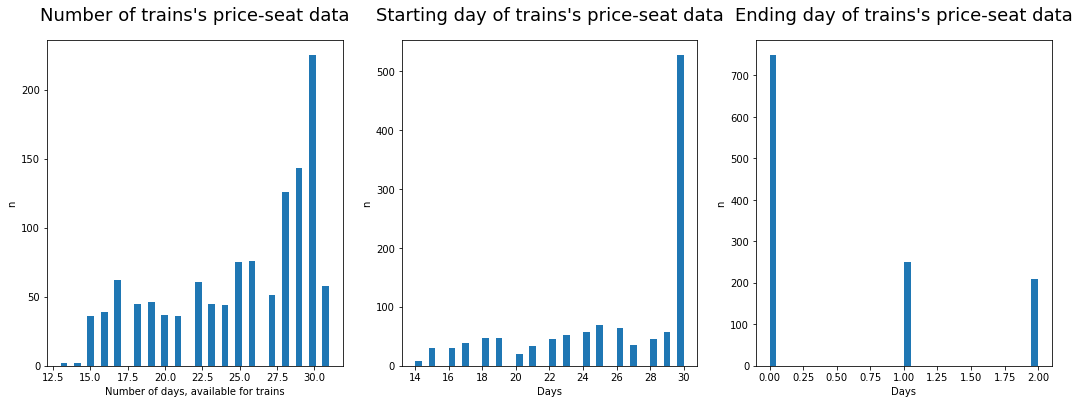

In [8]:
figdata = data.sort_values(by=["train_id", "days_till_dep"]).groupby("train_id")[
    "days_till_dep"
]

plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 3, 1)
#ax1.set_xlim(13, 35)
# ax1.set_ylim(0,50)
ax1.hist(figdata.count(), bins=40)
plt.xlabel("Number of days, available for trains", fontsize=10, fontweight=450)
plt.ylabel("n", fontsize=10, fontweight=450)

plt.title("Number of trains's price-seat data", fontsize=18, y=1.04)


ax2 = plt.subplot(1, 3, 2)
# ax2.set_xlim(35, 110)
# ax2.set_ylim(0, 0.14)
ax2.hist(figdata.last(), bins=40)
plt.xlabel("Days", fontsize=10, fontweight=450)
plt.ylabel("n", fontsize=10, fontweight=450)

plt.title(
    "Starting day of trains's price-seat data", fontsize=18, y=1.04
)


ax3 = plt.subplot(1, 3, 3)
# ax3.set_xlim(35, 110)
# ax3.set_ylim(0, 0.14)
ax3.hist(figdata.first(), bins=40)
plt.xlabel("Days", fontsize=10, fontweight=450)
plt.ylabel("n", fontsize=10, fontweight=450)

plt.title(
    "Ending day of trains's price-seat data", fontsize=18, y=1.04
)

plt.savefig("figures/days_plots", dpi=300)

plt.show()

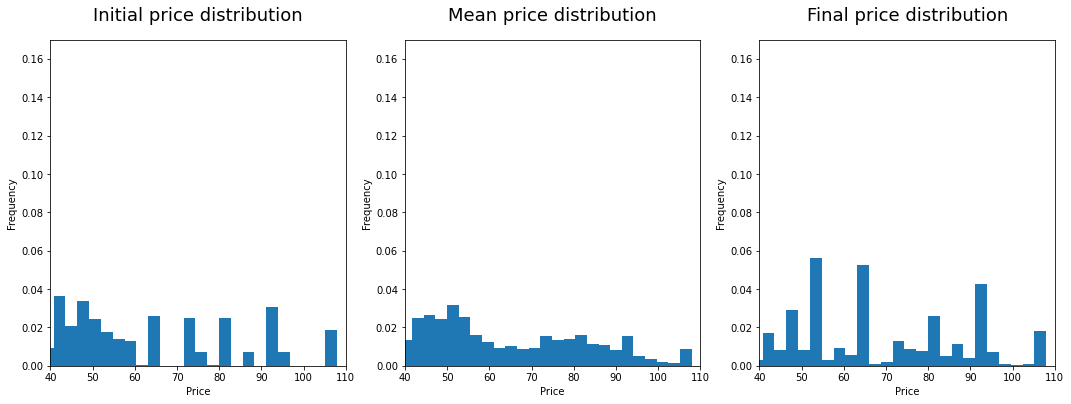

In [9]:
figdata = data.sort_values(by=["train_id", "days_till_dep"]).groupby("train_id")[
    "mean_econ_price"
]

plt.figure(figsize=(18, 6))

xlim_min = 40
xlim_max = 110
ylim_min = 0
ylim_max = 0.17

ax1 = plt.subplot(1, 3, 1)
ax1.set_xlim(xlim_min, xlim_max)
ax1.set_ylim(ylim_min, ylim_max)
ax1.hist(figdata.last(), bins=30, density=True)
plt.xlabel("Price", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Initial price distribution", fontsize=18, y=1.04)


ax2 = plt.subplot(1, 3, 2)
ax2.set_xlim(xlim_min, xlim_max)
ax2.set_ylim(ylim_min, ylim_max)
ax2.hist(figdata.mean(), bins=30, density=True)
plt.xlabel("Price", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Mean price distribution", fontsize=18, y=1.04)


ax3 = plt.subplot(1, 3, 3)
ax3.set_xlim(xlim_min, xlim_max)
ax3.set_ylim(ylim_min, ylim_max)
ax3.hist(figdata.first(), bins=30, density=True)
plt.xlabel("Price", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Final price distribution", fontsize=18, y=1.04)

plt.savefig("figures/price_distributions", dpi=300)

plt.show()

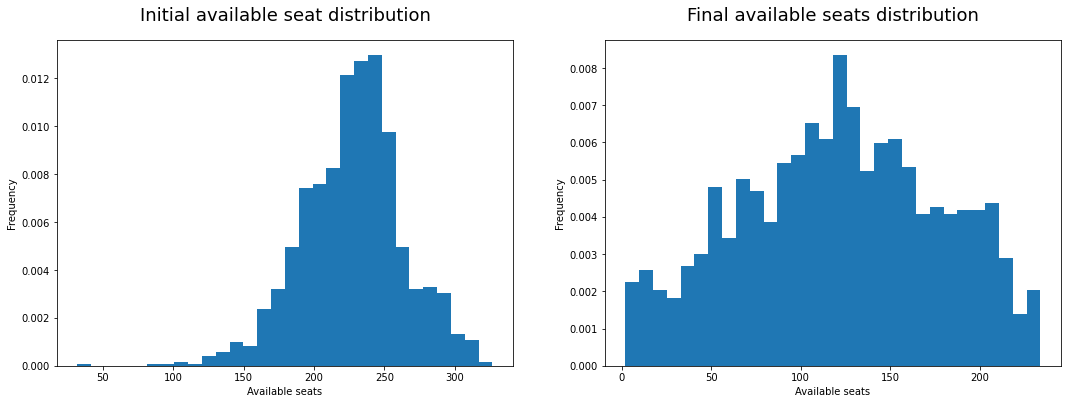

In [10]:
figdata = data.sort_values(by=["train_id", "days_till_dep"]).groupby("train_id")[
    "mean_econ_seats"
]

plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 2, 1)
#ax1.set_xlim(35, 110)
#ax1.set_ylim(0, 0.14)
ax1.hist(figdata.last(), bins=30, density=True)
plt.xlabel("Available seats", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Initial available seat distribution", fontsize=18, y=1.04)


ax3 = plt.subplot(1, 2, 2)
#ax3.set_xlim(35, 110)
#ax3.set_ylim(0, 0.14)
ax3.hist(figdata.first(), bins=30, density=True)
plt.xlabel("Available seats", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Final available seats distribution", fontsize=18, y=1.04)

plt.savefig("figures/price_distributions", dpi=300)

plt.show()

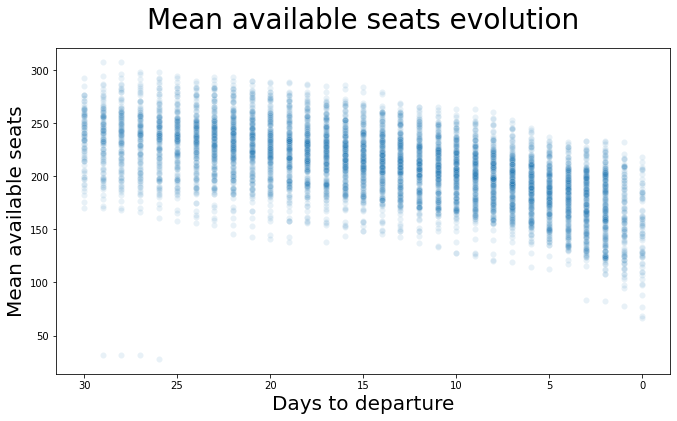

In [151]:
plt.figure(figsize=(11, 6))

sns.scatterplot(
    data=data.loc[data["route_main"] == "CORDOBA"],
    x="days_till_dep",
    y="mean_econ_seats",
    alpha=0.1
    #hue="train_id",
)#.get_legend().remove()


plt.gca().invert_xaxis()

plt.xlabel("Days to departure", fontsize=20, fontweight=450)
plt.ylabel("Mean available seats", fontsize=20, fontweight=450)

plt.title("Mean available seats evolution", fontsize=28, y=1.04)

plt.savefig("figures/available_seats_evolution", dpi=300)
plt.show()

<AxesSubplot:>

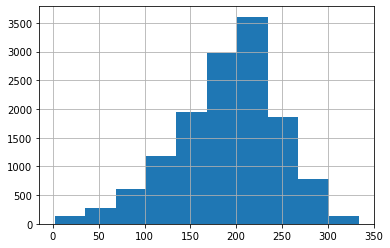

In [150]:
data.query("route_main == 'BARCELONA'")["max_econ_seats"].hist()

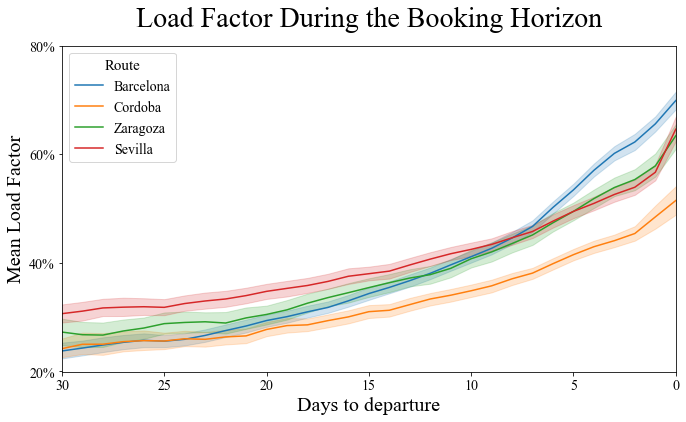

In [231]:
fig, ax = plt.subplots(figsize=(11, 6))

sns.lineplot(
    data=data, x="days_till_dep", y="loading_factor", estimator="mean", hue="route_main"
)

plt.xlim(30, 0)

plt.xlabel("Days until departure", fontsize=20, fontweight=450)
plt.ylabel("Mean Load Factor", fontsize=20, fontweight=450)

plt.title("Load Factor During the Booking Horizon", fontsize=28, y=1.04)
plt.legend(
    ("Barcelona", "Cordoba", "Zaragoza", "Sevilla"), loc="upper left", prop={"size": 14}
).set_title("Route", prop={"size": 15})


ax.tick_params(axis="both", which="major", labelsize=14)

ax.set_yticks(np.arange(0.2, 1, 0.2))
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.savefig("figures/load_factor", dpi=300)
plt.show()

# route categorical

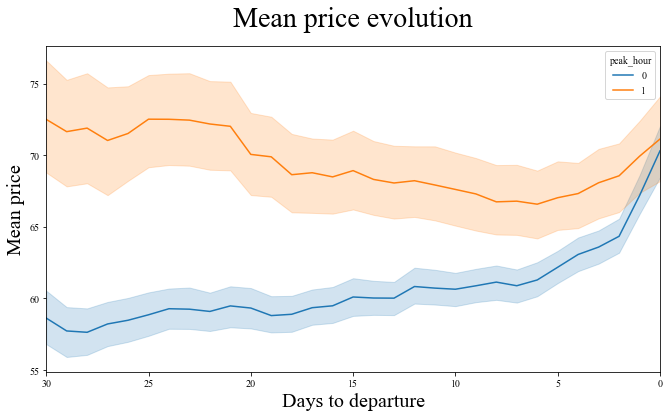

In [232]:
plt.figure(figsize=(11, 6))

sns.lineplot(
    data=data,
    x="days_till_dep",
    y="mean_econ_price",
    estimator="mean",
    hue="peak_hour",
)#.get_legend().remove()


plt.gca().invert_xaxis()

plt.xlabel("Days to departure", fontsize=20, fontweight=450)
plt.ylabel("Mean price", fontsize=20, fontweight=450)

plt.xlim(30,0)
#plt.ylim(75,90)

plt.title("Mean price evolution", fontsize=28, y=1.04)

plt.savefig("figures/mean price evolution", dpi=300)
plt.show()

# peak hour difference in price

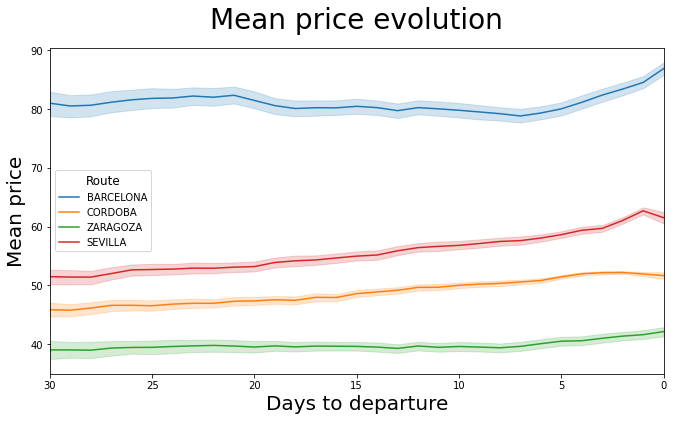

In [207]:
plt.figure(figsize=(11, 6))

sns.lineplot(
    data=data,
    x="days_till_dep",
    y="mean_econ_price",
    estimator="mean",
    hue="route_main",
)  # .get_legend().remove()


plt.gca().invert_xaxis()

plt.xlabel("Days to departure", fontsize=20, fontweight=450)
plt.ylabel("Mean price", fontsize=20, fontweight=450)

plt.xlim(30, 0)
plt.legend().set_title("Route", prop={"size": 12})

plt.title("Mean price evolution", fontsize=28, y=1.04)

plt.savefig("figures/mean price evolution", dpi=300)
plt.show()

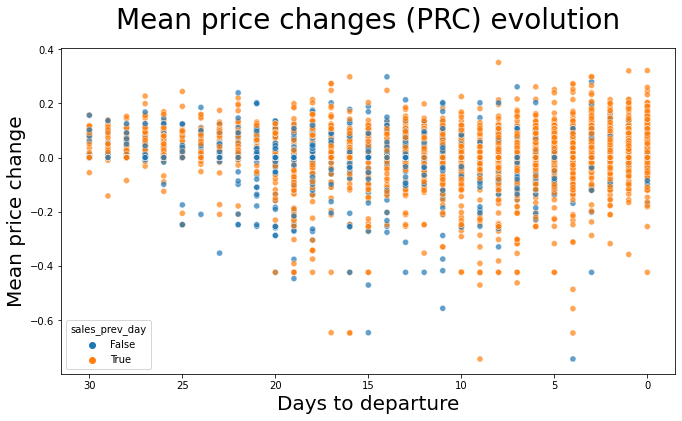

In [15]:
train_ids = (
    data.groupby("train_id")["price_change"]
    .max()
    .reset_index()
    .sort_values(by=["price_change"])
    .reset_index(drop=True)
    .loc[:, "train_id"]
    .values
)
plt.figure(figsize=(11, 6))

sns.scatterplot(
    data=data.loc[data["train_id"].isin(train_ids)],
    x="days_till_dep",
    y="price_change_percentage",
    estimator="mean",
    hue="sales_prev_day",
    alpha=0.7,
)  # .get_legend().remove()


plt.gca().invert_xaxis()

plt.xlabel("Days to departure", fontsize=20, fontweight=450)
plt.ylabel("Mean price change", fontsize=20, fontweight=450)

plt.title("Mean price changes (PRC) evolution", fontsize=28, y=1.04)

plt.savefig("figures/mean price (PRC) changes", dpi=300)
plt.show()

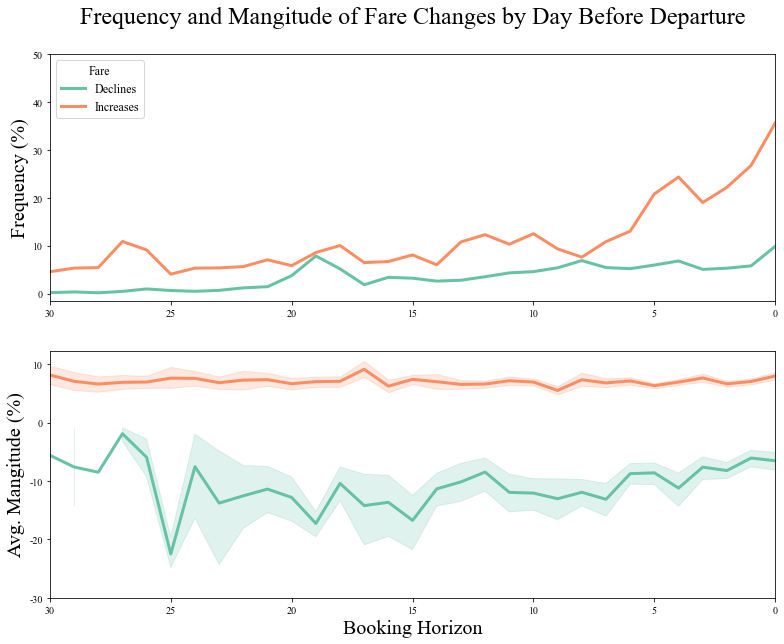

In [215]:
plt.figure(figsize=(13, 10))


figdata = (
    pd.DataFrame(data.groupby("days_till_dep")["price_change_direction"].value_counts())
    .rename(columns={"price_change_direction": "sum"})
    .reset_index()
)

figdata = figdata.merge(
    figdata.groupby("days_till_dep")["sum"]
    .sum()
    .reset_index()
    .rename(columns={"sum": "all"}),
    on="days_till_dep",
)

figdata["price_change_freq"] = figdata["sum"] / figdata["all"]

figdata = figdata.loc[figdata["price_change_direction"] != 0]

# TOP FIG.
ax1 = plt.subplot(2, 1, 1)

sns.lineplot(
    data=figdata,
    x="days_till_dep",
    y="price_change_freq",
    hue="price_change_direction",
    palette="Set2",
    linewidth=3,
    ax=ax1,
)

plt.gca().invert_xaxis()

plt.xlabel("", fontsize=0, fontweight=450)
plt.ylabel("Frequency (%)", fontsize=20, fontweight=450)
plt.title(
    "Frequency and Mangitude of Fare Changes by Day Before Departure",
    fontsize=24,
    y=1.1,
)


ax1.legend(("Declines", "Increases"), loc="upper left", prop={"size": 12}).set_title(
    "Fare", prop={"size": 12}
)

tick_max = 0.5
tick_interval = 0.1
ax1.set_yticks(np.arange(0, tick_max + tick_interval, tick_interval))
ax1.set_yticklabels(np.arange(0, 60, 10))
ax1.set_xlim(30, 0)


# BOTTOM FIG.
figdata_2 = data.loc[data["price_change_direction"] != 0]

ax2 = plt.subplot(2, 1, 2)
sns.lineplot(
    data=figdata_2,
    x="days_till_dep",
    y="price_change_percentage",
    estimator="mean",
    hue="price_change_direction",
    palette="Set2",
    linewidth=3,
    ax=ax2,
).get_legend().remove()

plt.gca().invert_xaxis()

plt.xlabel("Booking Horizon", fontsize=20, fontweight=450)
plt.ylabel("Avg. Mangitude (%)", fontsize=20, fontweight=450)


tick_max = 0.1
tick_min = -0.3
tick_interval = 0.1

ax2.set_yticks(np.arange(tick_min, tick_max + tick_interval, tick_interval))
ax2.set_yticklabels(
    np.arange(int(tick_min * 100), int(tick_max * 100 + 1), int(tick_interval * 100))
)
ax2.set_xlim(30, 0)


plt.savefig("figures/freq_and_magn_of_fare_changes", dpi=300)
plt.show()

# bele

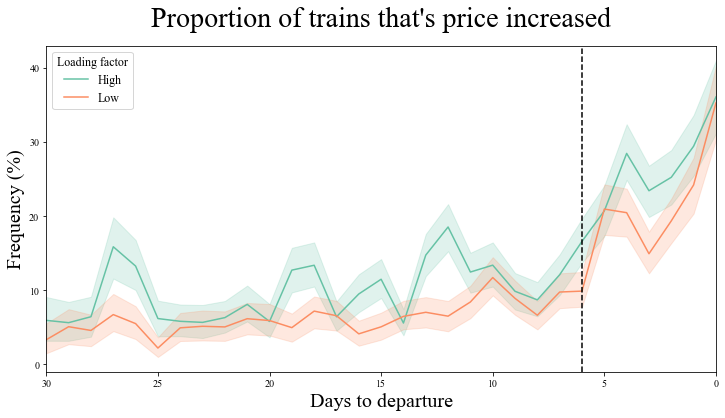

In [216]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=data,
    x="days_till_dep",
    y="price_increase",
    estimator="mean",
    hue="loading_factor_cat",
    palette="Set2"
)
plt.gca().invert_xaxis()

tick_max = 0.4
tick_min = 0
tick_interval = 0.1

ax.set_yticks(np.arange(tick_min, tick_max + tick_interval, tick_interval))
ax.set_yticklabels(
    np.arange(int(tick_min * 100), int(tick_max * 100 + 1), int(tick_interval * 100))
)

ax.legend(("High", "Low"), loc="upper left", prop={"size": 12}).set_title(
    "Loading factor", prop={"size": 12}
)

ax.set_xlim(30, 0)
plt.xlabel("Days to departure", fontsize=20, fontweight=450)
plt.ylabel("Frequency (%)", fontsize=20, fontweight=450)

plt.axvline(6, 0, 1, color="black", linestyle="--", linewidth=1.5)


plt.title("Proportion of trains that's price increased", fontsize=28, y=1.04)

plt.savefig("figures/price_change_loading_days", dpi=300)
plt.show()

# kell

___